<a href="https://colab.research.google.com/github/SuhasTantri/Bike-Demand-Prediction/blob/branch-1/Suhas_Bike_sharing_Demand_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [142]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
import warnings
warnings.filterwarnings('ignore')

In [143]:
# reading the dataset
df=pd.read_csv('/Users/amoghpai/Downloads/SeoulBikeData (1).csv',encoding='unicode_escape')

In [144]:
# brief look at the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [145]:
# Shape of the dataset
df.shape

(8760, 14)

In [146]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [147]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [148]:
# correlation among the variables
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [149]:
# Looking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**No null values are present in the dataset**

In [150]:
# Creating list pf numerical features
numeric_features=df.describe().columns
dist_col=list(numeric_features)[1:-3]
dist_col

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)']

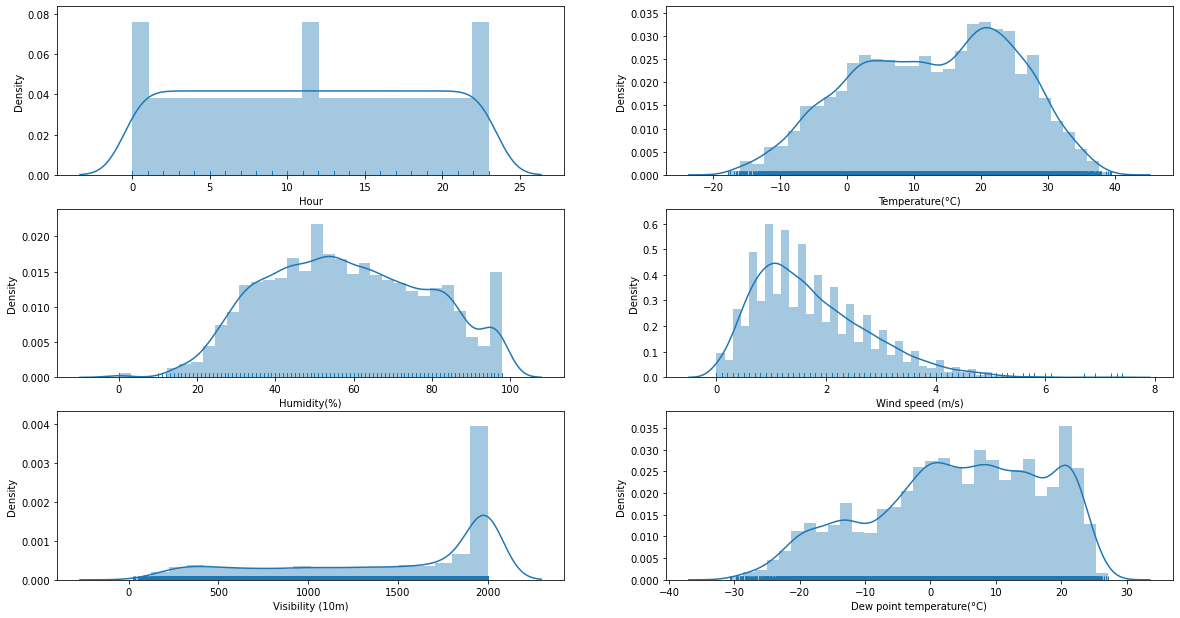

In [151]:
# Let's look at the distribution of the variables using distplot
plt.figure(figsize=(20,18))
for i in range(len(dist_col)):
  plt.subplot(5,2,i+1)
  sns.distplot(df[dist_col[i]],hist=True,rug=True)

In [152]:
# Extracting month and year from the date
frame = pd.to_datetime(df['Date'],dayfirst=True)
df['month']= frame.dt.month
df['year']=frame.dt.year


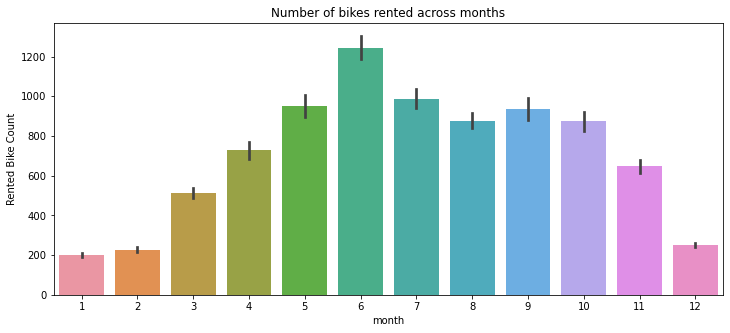

In [153]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='Rented Bike Count',data=df)
plt.title('Number of bikes rented across months')
plt.show()

**June month has the highest rented bike count**

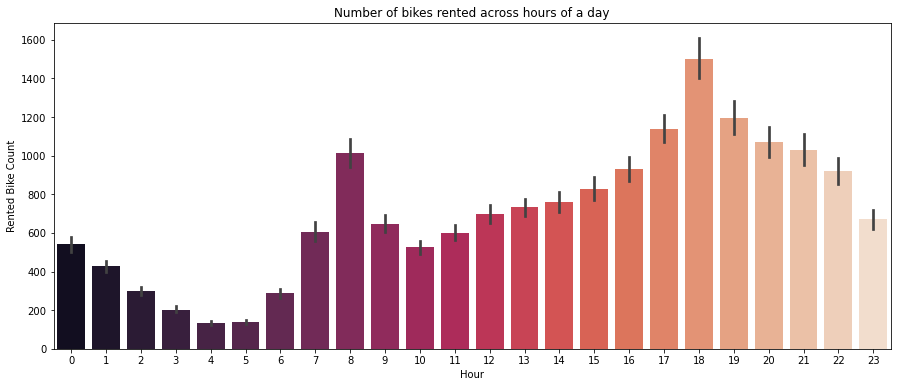

In [154]:
# bar plot
plt.figure(figsize=(15,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df,palette='rocket')
plt.title('Number of bikes rented across hours of a day')
plt.show()

**6 pm is the busiest time of the day for bike rental company as more customers rent bike during that time**

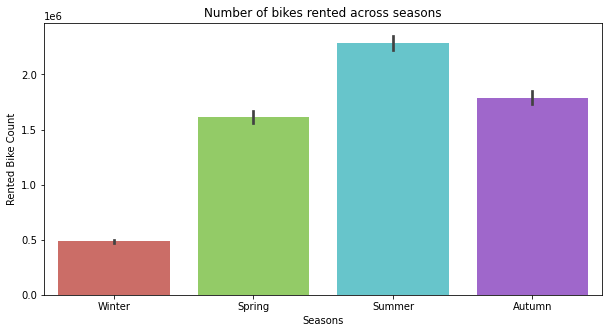

In [155]:
# bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df,estimator=sum,palette='hls')
plt.title('Number of bikes rented across seasons')
plt.show()

**Summer Season has the highest rented bike count on average**

Text(0.5, 1.0, 'Plot of temperature against rented bike count')

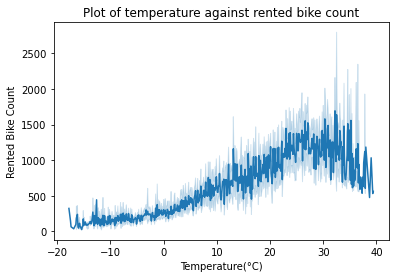

In [156]:
# lineplot
sns.lineplot(data=df,x=df['Temperature(°C)'],y=df['Rented Bike Count'])
plt.title('Plot of temperature against rented bike count')

**Temperature between 20 and 30 (°C) is when more number of bikes are rented**

Text(0.5, 1.0, 'Plot of Dew point temperature against rented bike count')

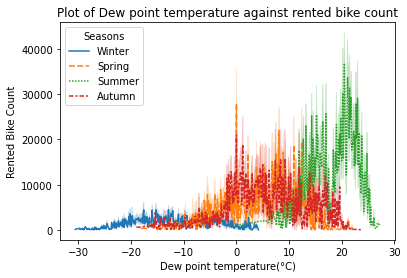

In [157]:
#lineplot
sns.lineplot(data=df,x=df['Dew point temperature(°C)'],y=df['Rented Bike Count'],estimator='sum',hue='Seasons',style='Seasons')
plt.title('Plot of Dew point temperature against rented bike count')

# **Checking for outliers using box plot**

<AxesSubplot:>

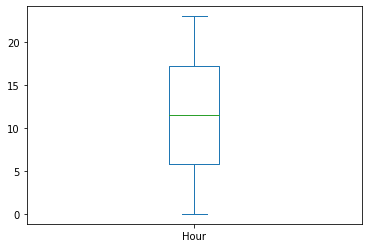

In [158]:
df.Hour.plot.box()

<AxesSubplot:>

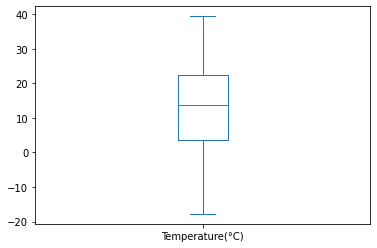

In [159]:
df['Temperature(°C)'].plot.box()

<AxesSubplot:>

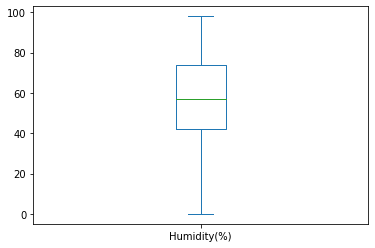

In [160]:
df['Humidity(%)'].plot.box()

<AxesSubplot:>

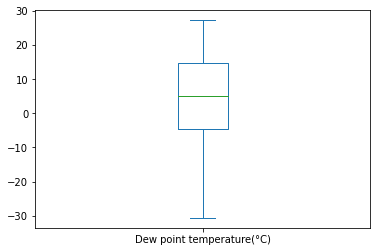

In [161]:
df['Dew point temperature(°C)'].plot.box()

<AxesSubplot:>

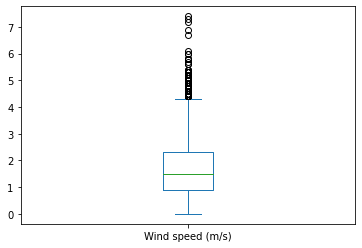

In [162]:
df['Wind speed (m/s)'].plot.box()

<AxesSubplot:>

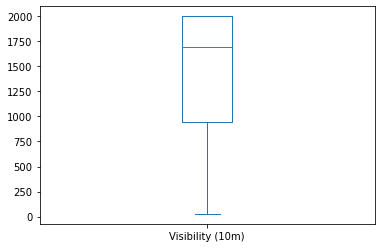

In [163]:
df['Visibility (10m)'].plot.box()

<AxesSubplot:>

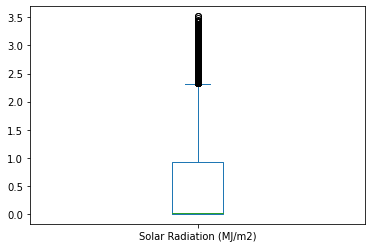

In [164]:
df['Solar Radiation (MJ/m2)'].plot.box()

<AxesSubplot:>

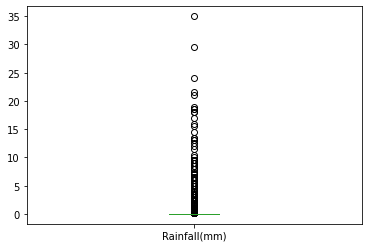

In [165]:
df['Rainfall(mm)'].plot.box()

<AxesSubplot:>

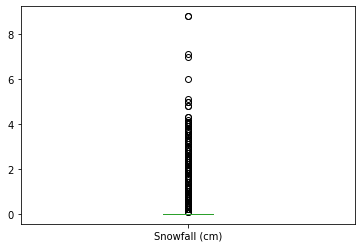

In [166]:
df['Snowfall (cm)'].plot.box()

In [167]:
# Outlier treatment
df['Rainfall(mm)']=np.log10(df['Rainfall(mm)']+1)
df['Snowfall (cm)']=np.log10(df['Snowfall (cm)']+1)

In [168]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [169]:
# unique values of seasons column
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [170]:
# unique values of holiday column
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [171]:
# unique value of functioning day column
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [172]:
# Preparing the data to scale down
newdf=df.drop(['Rented Bike Count','Date'],axis=1)

In [173]:
# Label encoding using lambda function
from sklearn.preprocessing import LabelEncoder
newdf['Holiday']=newdf['Holiday'].apply(lambda x:0 if x=='No Holiday' else 1)
newdf['Functioning Day']=newdf['Functioning Day'].apply(lambda x:0 if x=='No' else 1)
labelencoder=LabelEncoder()
newdf['Seasons']=labelencoder.fit_transform(newdf['Seasons'])

In [174]:
newdf['Date']=df['Date']
newdf['Rented Bike Count']=df['Rented Bike Count']

In [175]:
newdf.drop(['Date'],axis=1,inplace=True)

In [176]:
newdf.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,12,2017,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,12,2017,78


In [177]:
# Scaling down the data
from sklearn.preprocessing import StandardScaler
mm=StandardScaler()
df1=mm.fit_transform(newdf)
df1=pd.DataFrame(df1,columns=list(newdf.columns))

df1['Rented Bike Count']=df['Rented Bike Count']
df1 = df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)



<AxesSubplot:>

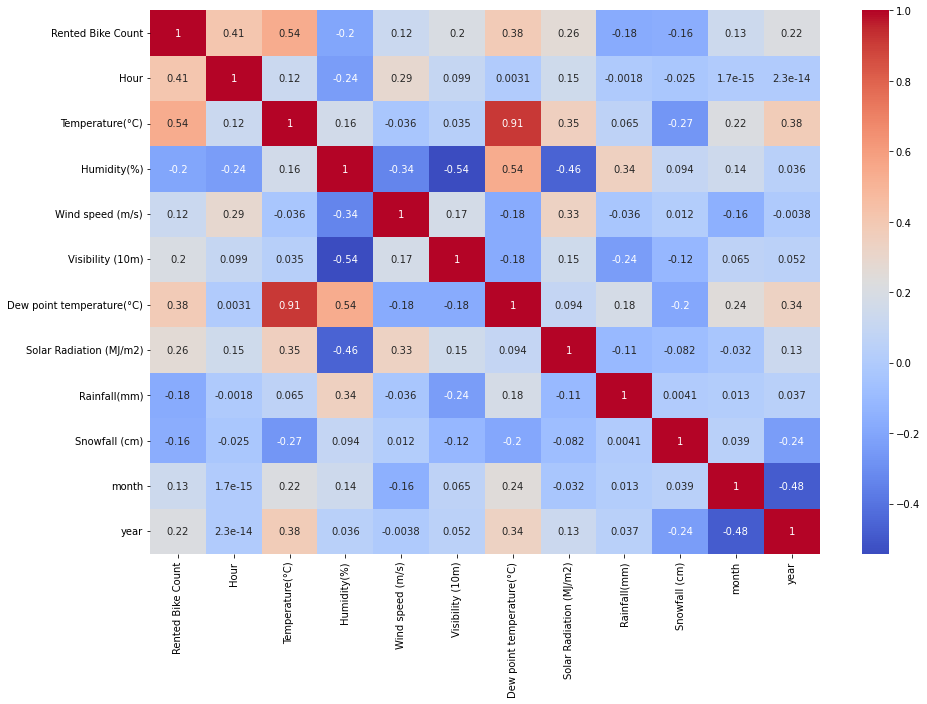

In [178]:
# Heatmap to see the correlation among the variables
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')


# ***Modelling***


In [179]:
#Importing libraries needed for modelling
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [180]:
df1.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Rented Bike Count
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,254
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,204
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,173
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,107
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.198745,-0.200251,1.349771,-0.227757,0.18668,1.587648,-3.282407,78


In [181]:
# Splitting the data into train and test
X=df1.drop(['Rented Bike Count','Wind speed (m/s)','month','year'],axis =1)
y=df1.iloc[:,-1] #the target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
seed= 1
score_result3={'Model':[],'Train R2 score':[],'Test R2 score':[],'Adjusted Train R2 Score':[],'Adjusted Test R2 Score' : []}

In [182]:
x = newdf.drop(['Rented Bike Count','Wind speed (m/s)','month','year'],axis = 1)
x_train,x_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25)

### Support Vector Regressor Model

In [183]:
# Applying Support Vector Regressor Algorithm
from sklearn.svm import SVR
svr_Model = SVR(C = 3000).fit(X_train, y_train)
r2_train_svr = svr_Model.score(X_train, y_train)
r2_test_svr=svr_Model.score(X_test, y_test)
r2_test_svr,r2_train_svr


(0.7920292788202505, 0.8111467047753205)

In [184]:
# Hyper parameter tuning
svr_Model=SVR()

param = {'C' : [2000,3000,4000,5000],'kernel':['rbf','cbf']}

gridSearchSVR=GridSearchCV(svr_Model,param,scoring='r2',cv=5)
gridSearchSVR.fit(X_train,y_train)

svr_optimal_model=gridSearchSVR.best_estimator_
gridSearchSVR.best_params_

{'C': 5000, 'kernel': 'rbf'}

In [185]:
# Making predictions on train and test data

svr_train_class_preds = svr_optimal_model.predict(X_train)
svr_test_class_preds = svr_optimal_model.predict(X_test)
svr_r2_train=r2_score(y_train,svr_train_class_preds)
svr_r2_test=r2_score(y_test,svr_test_class_preds)
adjusted_r2_train = 1 - ( 1-svr_optimal_model.score(X_train, y_train) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
adjusted_r2_test = 1 - ( 1-svr_optimal_model.score(X_test, y_test) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print('Train R2 score of optimal SVR model is' ,round(svr_r2_train*100,2))
print('Test R2 score of optimal SVR model is' ,round(svr_r2_test*100,2))
print('Train adjusted R2 score of optimal SVR model is ',round(adjusted_r2_train*100,2))
print('Test adjusted R2 score of optimal SVR model is ',round(adjusted_r2_test*100,2))

Train R2 score of optimal SVR model is 82.09
Test R2 score of optimal SVR model is 79.98
Train adjusted R2 score of optimal SVR model is  82.07
Test adjusted R2 score of optimal SVR model is  79.96


In [186]:
score_result3['Model'].append('SVM Regressor')
score_result3['Train R2 score'].append(round(svr_r2_train*100,2))
score_result3['Test R2 score'].append(round(svr_r2_test*100,2))
score_result3['Adjusted Train R2 Score'].append(round(adjusted_r2_train*100,2))
score_result3['Adjusted Test R2 Score'].append(round(adjusted_r2_test*100,2))

### KNN Model

In [187]:
knn = KNeighborsRegressor(n_neighbors=18)

In [188]:
# Fitting the model
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=18)

In [189]:
# Predicting the values of y_test 
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7850645795746176

In [190]:
param_grid = {'n_neighbors':np.arange(15,19)}

In [191]:
# Hyper parameter tuning
knn = KNeighborsRegressor(p=1)
knn_cv= GridSearchCV(knn,param_grid,scoring='r2',cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(p=1),
             param_grid={'n_neighbors': array([15, 16, 17, 18])}, scoring='r2')

In [192]:
# Best possible score and parameters
knn_cv.best_score_,knn_cv.best_params_,knn_cv.best_estimator_

(0.8059771899800239,
 {'n_neighbors': 15},
 KNeighborsRegressor(n_neighbors=15, p=1))

In [193]:
# Considering best estimator as optimal model
knn_optimal_model=knn_cv.best_estimator_

In [194]:
# Making predictions on train and test data

knn_train_class_preds = knn_optimal_model.predict(X_train)
knn_test_class_preds = knn_optimal_model.predict(X_test)
knn_r2_train=r2_score(y_train,knn_train_class_preds)
knn_r2_test=r2_score(y_test,knn_test_class_preds)
knn_adjusted_r2_train = 1 - ( 1-knn_optimal_model.score(X_train, y_train) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
knn_adjusted_r2_test = 1 - ( 1-knn_optimal_model.score(X_test, y_test) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print('Train R2 score of optimal knn model is' ,round(knn_r2_train*100,2))
print('Test R2 score of optimal knn model is' ,round(knn_r2_test*100,2))
print('Train adjusted R2 score of optimal knn model is', round(knn_adjusted_r2_train*100,2))
print('Test adjusted R2 score of optimal knn model is', round(knn_adjusted_r2_test*100,2))


Train R2 score of optimal knn model is 83.76
Test R2 score of optimal knn model is 80.76
Train adjusted R2 score of optimal knn model is 83.74
Test adjusted R2 score of optimal knn model is 80.74


In [195]:
score_result3['Model'].append('KNN Regressor')
score_result3['Train R2 score'].append(round(knn_r2_train*100,2))
score_result3['Test R2 score'].append(round(knn_r2_test*100,2))
score_result3['Adjusted Train R2 Score'].append(round(knn_adjusted_r2_train*100,2))
score_result3['Adjusted Test R2 Score'].append(round(knn_adjusted_r2_test*100,2))


### Decision Tree Model

In [196]:
# Decision tree model and hyper parameter tuning
from pandas.core.common import random_state
decisionTree = DecisionTreeRegressor(random_state=seed)

param = {'max_depth' : [6,7,8,10],'max_features':[10,11,13,15]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=3)
gridSearch_decisionTree.fit(x_train,Y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 7, 8, 10],
                         'max_features': [10, 11, 13, 15]},
             scoring='r2')

In [197]:
gridSearch_decisionTree.best_estimator_


DecisionTreeRegressor(max_depth=10, max_features=10, random_state=1)

In [198]:
gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_


(0.8049116647827277, {'max_depth': 10, 'max_features': 10})

In [199]:
# Considering optimal model as best estimator from gridsearch
dt_optimal_model=gridSearch_decisionTree.best_estimator_

In [200]:
# Making predictions on train and test data

dt_train_class_preds = dt_optimal_model.predict(x_train)
dt_test_class_preds = dt_optimal_model.predict(x_test)
dt_r2_train=r2_score(Y_train,dt_train_class_preds)
dt_r2_test=r2_score(Y_test,dt_test_class_preds)
dt_adjusted_r2_train = 1 - ( 1- dt_optimal_model.score(x_train, Y_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
dt_adjusted_r2_test = 1 - ( 1- dt_optimal_model.score(x_test, Y_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print('Train R2 score of optimal decision tree model is' ,round(dt_r2_train*100,2))
print('Test R2 score of optimal decision tree model is' ,round(dt_r2_test*100,2))
print('Train adjusted R2 score of optimal decision tree model is' ,round(dt_adjusted_r2_train*100,2))
print('Test adjusted R2 score of optimal decision tree model is' ,round(dt_adjusted_r2_test*100,2))

Train R2 score of optimal decision tree model is 89.18
Test R2 score of optimal decision tree model is 79.9
Train adjusted R2 score of optimal decision tree model is 89.16
Test adjusted R2 score of optimal decision tree model is 79.88


In [201]:
score_result3['Model'].append('Decision Tree')
score_result3['Train R2 score'].append(round(dt_r2_train*100,2))
score_result3['Test R2 score'].append(round(dt_r2_test*100,2))
score_result3['Adjusted Train R2 Score'].append(round(dt_adjusted_r2_train*100,2))
score_result3['Adjusted Test R2 Score'].append(round(dt_adjusted_r2_test*100,2))

### Random Forest Model

In [202]:
# Random Forest Algorithm and Hyper parameter tuning 
randomForestAlgo = RandomForestRegressor(random_state=seed)

param = {'n_estimators' : [50,60,70,80], 
         'max_depth' : [5,6,7,8]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=3)
gridSearch_RandomForest.fit(x_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'n_estimators': [50, 60, 70, 80]},
             scoring='r2')

In [203]:
# Considering optimal model as best estimator from gridsearch
rf_optimal_model=gridSearch_RandomForest.best_estimator_


In [204]:
# Making predictions on train and test data

rf_train_class_preds = rf_optimal_model.predict(x_train)
rf_test_class_preds = rf_optimal_model.predict(x_test)
rf_r2_train=r2_score(Y_train,rf_train_class_preds)
rf_r2_test=r2_score(Y_test,rf_test_class_preds)
rf_adjusted_r2_train=1 - ( 1- rf_optimal_model.score(x_train, Y_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
rf_adjusted_r2_test=1 - ( 1- rf_optimal_model.score(x_test, Y_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print('Train R2 score of optimal Random Forest model is' ,round(rf_r2_train*100,2))
print('Test R2 score of optimal Random Forest model is' ,round(rf_r2_test*100,2))
print('Train adjusted R2 score of optimal Random Forest model is' ,round(rf_adjusted_r2_train*100,2))
print('Test adjusted R2 score of optimal Random Forest model is' ,round(rf_adjusted_r2_test*100,2))

Train R2 score of optimal Random Forest model is 87.49
Test R2 score of optimal Random Forest model is 83.67
Train adjusted R2 score of optimal Random Forest model is 87.47
Test adjusted R2 score of optimal Random Forest model is 83.65


In [205]:
!pip install xgboost

In [206]:
from xgboost import XGBRegressor
xgb=XGBRegressor(objective='reg:linear',n_estimators=100,seed=1,random_state=seed,learning_rate=0.05)
# Fitting the model
xgb.fit(x_train,Y_train,early_stopping_rounds=5,eval_set=[(x_test,Y_test)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=1, reg_alpha=0, ...)

In [207]:
score_result3['Model'].append('Random Forest')
score_result3['Train R2 score'].append(round(rf_r2_train*100,2))
score_result3['Test R2 score'].append(round(rf_r2_test*100,2))
score_result3['Adjusted Train R2 Score'].append(round(rf_adjusted_r2_train*100,2))
score_result3['Adjusted Test R2 Score'].append(round(rf_adjusted_r2_test*100,2))


### XGBoost Model

In [208]:
# Predicting results on test data 
predict_test = xgb.predict(x_test)
r2_score(predict_test,Y_test)

0.8391091368981817

In [209]:
# Hyper parameter tuning
param_test = {
 'reg_alpha':[96,98,100,102,104]
}
gsearch = GridSearchCV(estimator = XGBRegressor(learning_rate=0.04,max_depth=7,n_estimators=50,verbosity=0,silent=True,colsample_bytree=0.9, min_child_weight=7,subsample=0.85,gamma=0,
objective= 'reg:linear', nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test, cv=5)
gsearch.fit(x_train,Y_train,early_stopping_rounds=5,eval_set=[(x_test,Y_test)],verbose=False)

gsearch.best_params_,

({'reg_alpha': 102},)

In [210]:
gsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.04, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=7,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=4,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=27, ...)

In [211]:
# Considering optimal model as best estimator from gridsearch CV
xgb_optimal_model=gsearch.best_estimator_

In [212]:
# Making predictions on train and test data

xgb_train_class_preds = xgb_optimal_model.predict(x_train)
xgb_test_class_preds = xgb_optimal_model.predict(x_test)

#Printing r2 score of test and train data
xgb_r2_train=r2_score(Y_train,xgb_train_class_preds)
xgb_r2_test=r2_score(Y_test,xgb_test_class_preds)
xgb_adjusted_r2_train=1 - ( 1- xgb_optimal_model.score(x_train, Y_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
xgb_adjusted_r2_test=1 - ( 1- xgb_optimal_model.score(x_test, Y_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print('Train R2 score of optimal XGBoost model is' ,round(xgb_r2_train*100,2))
print('Test R2 score of optimal XGBoost model is' ,round(xgb_r2_test*100,2))
print('Train adjusted R2 score of optimal XGBoost model is' ,round(xgb_adjusted_r2_train*100,2))
print('Test adjusted R2 score of optimal XGBoost model is' ,round(xgb_adjusted_r2_test*100,2))

Train R2 score of optimal XGBoost model is 83.78
Test R2 score of optimal XGBoost model is 81.2
Train adjusted R2 score of optimal XGBoost model is 83.76
Test adjusted R2 score of optimal XGBoost model is 81.18


In [213]:
score_result3['Model'].append('XGBoost')
score_result3['Train R2 score'].append(round(xgb_r2_train*100,2))
score_result3['Test R2 score'].append(round(xgb_r2_test*100,2))
score_result3['Adjusted Train R2 Score'].append(round(xgb_adjusted_r2_train*100,2))
score_result3['Adjusted Test R2 Score'].append(round(xgb_adjusted_r2_test*100,2))

In [214]:
# Displaying the results of all the models
result_df=pd.DataFrame(data=score_result3)
result_df

,Model,Train R2 score,Test R2 score,Adjusted Train R2 Score,Adjusted Test R2 Score
0,SVM Regressor,82.09,79.98,82.07,79.96
1,KNN Regressor,83.76,80.76,83.74,80.74
2,Decision Tree,89.18,79.90,89.16,79.88
3,Random Forest,87.49,83.67,87.47,83.65
4,XGBoost,83.78,81.20,83.76,81.18


# **Summary**

# 1. Performed Exploratory Data Analysis on the data to gain some insights.

# 2.Treated the outliers using log transformation.

# 3. Label encoding was done for categorical variables.

# 4.Standard Scaler was used to scale down the data.

# 5.Applied 5 machine learning models on the dataset i.e,

###- Support Vector Machine.
###- K Nearest Neighbor.
###- Decision Tree.
###- Random Forest Classifier.
###- XGBoost.

# 6.Hyperparameter tuning was performed on all the models using Grid Search CV to get best parameters and best scores.

# 7.Random Forest Model performed best among the five models with train adjusted R2 score of 87.47 % and test adjusted R2 score of 83.65 %.
